In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
%matplotlib inline

In [5]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [6]:
quandl.ApiConfig.api_key = "API KEY"

In [7]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [16]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [18]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [20]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [21]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


# Simulating Thousands of Possible Allocations

In [22]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [23]:
stock_normed = stocks / stocks.iloc[0]

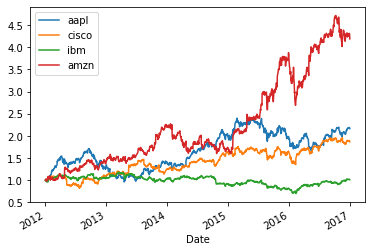

In [25]:
stock_normed.plot()

In [27]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


## Log Returns vs Arithmetic Returns

In [30]:
log_ret = np.log(stocks/stocks.shift(1)).dropna()
log_ret

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428
2012-01-10,0.003574,-0.007407,-0.001543,0.004359
...,...,...,...,...
2016-12-23,0.001976,0.002295,-0.002097,-0.007531
2016-12-27,0.006331,0.004901,0.002576,0.014113
2016-12-28,-0.004273,-0.008511,-0.005700,0.000946


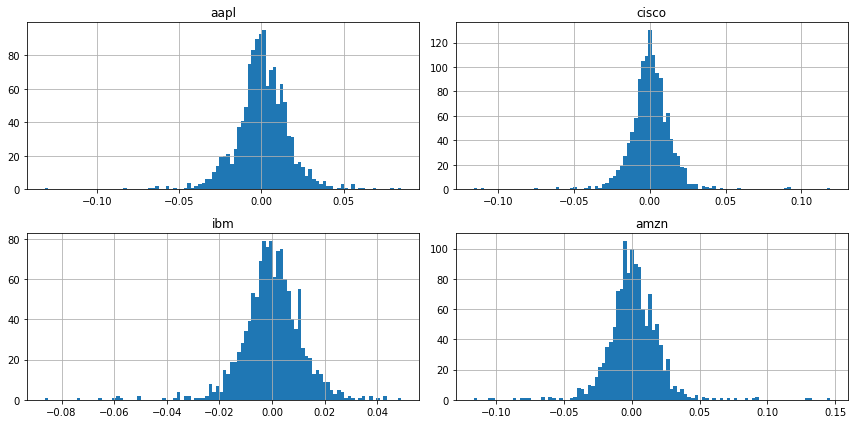

In [33]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [34]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,1257.0,0.000614,0.016466,-0.131875,-0.007358,0.000455,0.009724,0.085022
cisco,1257.0,0.000497,0.014279,-0.116091,-0.006240,0.000213,0.007634,0.118862
ibm,1257.0,0.000011,0.011819,-0.086419,-0.005873,0.000049,0.006477,0.049130
amzn,1257.0,0.001139,0.019362,-0.116503,-0.008534,0.000563,0.011407,0.146225


In [35]:
log_ret.mean() * 252

aapl     0.154803
cisco    0.125291
ibm      0.002788
amzn     0.287153
dtype: float64

In [36]:
# compute pairwise covariance of columns
log_ret.cov()

,aapl,cisco,ibm,amzn
aapl,0.000271,0.000071,0.000057,0.000075
cisco,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


In [37]:
log_ret.cov() * 252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [56]:
np.random.seed(101)

print(stocks.columns)

weights = np.array(np.random.random(4))
print('Random Weights:')
print(weights)
print('\n')

# Rebalacing the weights

weights /= np.sum(weights)
print('Rebalance Sum of weights to 1')
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) * 252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_var = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov() * 252, weights)))
print(exp_var)
print('\n')

# Sharpe Ratio
rf = 0.1/252 # risk free rate
SR = (exp_ret - rf)/exp_var
print('Sharpe Ratio')
print(SR)

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
Random Weights:
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance Sum of weights to 1
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.15599272049632504


Expected Volatility
0.18502649565908946


Sharpe Ratio
0.8409384534103939


Running the above operation many times over

In [96]:
num_ports = 15000

rf = 0.01/252 # risk free rate

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    
    # create random weights
    weights = np.array(np.random.random(4))
    
    # normalize the array
    weights /= np.sum(weights)
    
    # save weights
    all_weights[ind,:] = weights
    
    # expected return
    ret_arr[ind] = np.sum(log_ret.mean() * weights) * 252
    
    # expected volatility 
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov() * 252,weights)))
    
    # sharpe ratio
    sharpe_arr[ind] = (ret_arr[ind] - rf)/vol_arr[ind]

In [105]:
sharpe_arr.max()

1.027425492648318

In [106]:
sharpe_arr.argmax()

11761

In [107]:
all_weights[sharpe_arr.argmax(),:]

array([0.3087724 , 0.18184999, 0.00408962, 0.505288  ])

In [108]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

# Plotting the Data

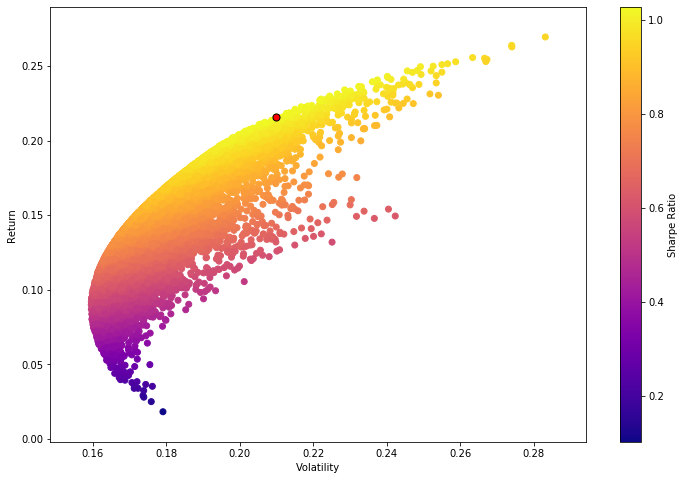

In [104]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol,max_sr_ret,c='r',s=50,edgecolors='k')

# Mathematical Optimization

In [111]:
def get_ret_vol_sr(weights):
    """Takes in weights, returns arrayof returns, volatility and sharpe ratio"""
    weights = np.array(weights)
    rf = 0.01/252 # risk free rate
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov() * 252,weights)))
    sr = (ret - rf)/vol
    return np.array([ret,vol,sr])

In [112]:
from scipy.optimize import minimize

In [113]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

In [114]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [115]:
# constraints
def check_sum(weights):
    """Returns 0 if weights sum to 1"""
    return np.sum(weights) - 1

In [116]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun':check_sum})

In [117]:
# 0-1 bounds for each weight
bounds = ((0,1),(0,1),(0,1),(0,1))

In [118]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

In [120]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [121]:
opt_results

     fun: -1.0305299977735491
     jac: array([-1.30251050e-04, -1.45137310e-04,  3.39813977e-01, -2.31429935e-04])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.26627655, 0.20412407, 0.        , 0.52959938])

In [122]:
opt_results.x

array([0.26627655, 0.20412407, 0.        , 0.52959938])

In [123]:
get_ret_vol_sr(opt_results.x)

array([0.21887155, 0.21234885, 1.03053   ])

# All Optimal Portfolios (Efficient Frontier)

The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal, because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are also sub-optimal, because they have a higher level of risk for the defined rate of return.

Efficient Frontier http://www.investopedia.com/terms/e/efficientfrontier

In [126]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100)

In [128]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [130]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun':check_sum},
           {'type': 'eq','fun':lambda w: get_ret_vol_sr(w)[0] - possible_return})
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

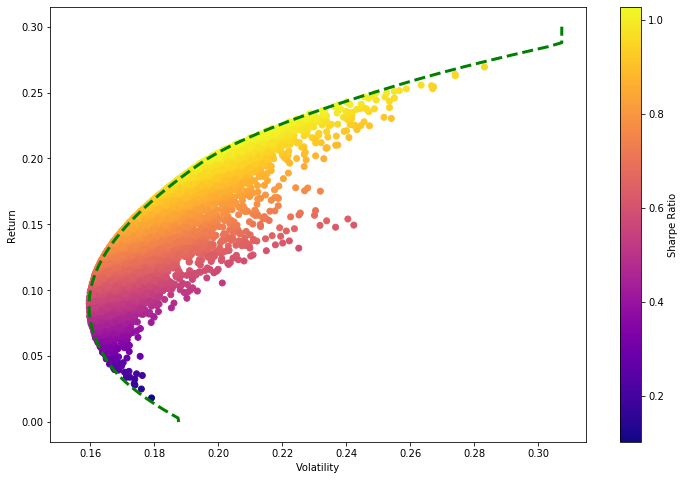

In [131]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',lw=3)